#### Task 1: Plug Eq. (7) into Eq. (6) and solve for the radiative equilibrium suface temperature $T_e$ 

In [11]:
# Solve for the radiative equilibrium temperature

sigma = 5.67e-8 # W m^-2 K^-4 
Q = 342         # Incoming shortwave radiation W m^-2
albedo = 0.3    # Albedo

Te = (((1-0.3)*342)/5.67e-8)**(1/4)

print('Radiative equilibrium temperature: {:.2f}'.format(Te))

Radiative equilibrium temperature: 254.91


#### Task 2: What is the surface temperature with the single layer model? 

In [12]:
# Solve for the atmospheric surface temperature

# Calc surface temperature
Ts = 2**(1/4) * Te
print('Surface temperature: {:.2f}'.format(Ts))

Surface temperature: 303.14


Why does the model overestimate the surface temperature?

#### Task 4: Write a Python function for $OLR = U_2 = (1-\epsilon)^2 \sigma T_s^4 + \epsilon(1-\epsilon)\sigma T_0^4 + \epsilon \sigma T_1^4$

In [13]:
def two_layer_model(Ts, T0, T1, epsilon):
    return ((1-epsilon)**2)*sigma*Ts**4 + epsilon*(1-epsilon)*sigma*T0**4 + epsilon*sigma*T1**4

#### Task 6: We will tune our model so that it reproduces the observed global mean OLR given observed global mean temperatures. Determine the temperatures for the two-layer model from the following sounding

![alt text](pics/vertical_profile.png "Sounding")

#### Task 7: Find graphically the best fit value of $\epsilon$


The optimized transmissivity is: 0.59


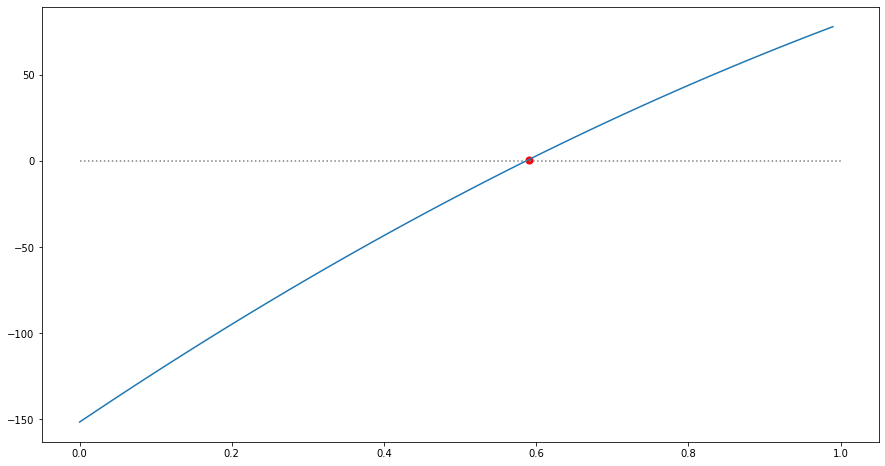

In [60]:
import numpy as np
import matplotlib.pyplot as plt

OLR = []        # initialize array
epsilons = []   # initialize array
OLR_obs = 238.5 # observed outgoing long-wave radiation

# Auxiliary function to find index of closest value 
def find_nearest(array, value):
    idx,val = min(enumerate(array), key=lambda x: abs(x[1]-value))
    return idx

# Optimize epsilon
for eps in np.arange(0, 1, 0.01):
    OLR.append(OLR_obs - two_layer_model(288, 275, 230, eps))
    epsilons.append(eps)

# Find the closest value to the observed OLR
idx = find_nearest(OLR, 0)

# Save the optimized epsilon
epsilon = epsilons[idx]

# Plot the results
print('The optimized transmissivity is: {:.2f}'.format(epsilons[idx]))
plt.figure(figsize=(15,8))
plt.plot(epsilons,OLR);
plt.scatter(epsilons[idx], OLR[idx], s=50,  color='r')
plt.hlines(0,0,1,linestyles='dotted',color='gray');
    

In [117]:
# Validate the result
print('The modelled OLR is {:.2f}, while the observed value is 238.5'.format(two_layer_model(288, 275, 230, epsilon)))

The modelled OLR is 237.63, while the observed value is 238.5


#### Task 8: Write a Python function to calculate each term in the OLR. Plug-in the observed temperatures and the tuned value for epsilon.

In [118]:
def two_layer_terms(Ts, T0, T1, epsilon):
    return ( ((1-epsilon)**2)*sigma*Ts**4, epsilon*(1-epsilon)*sigma*T0**4, epsilon*sigma*T1**4)

In [119]:
term1, term2, term3 = two_layer_terms(288, 275, 230, epsilon)
print('Term 1: {:.2f} \nTerm 2: {:.2f} \nTerm 3: {:.2f} \nTotal: {:.2f}'.format(term1, term2, term3, term1+term2+term3))

Term 1: 65.57 
Term 2: 78.44 
Term 3: 93.62 
Total: 237.63


#### Task 9: Changing the level of emission by adding absorbers, e.g. by 10 %. 
Suppose further that this increase happens abruptly so that there is no time for the temperatures to respond to this change. We hold the temperatures fixed in the column and ask how the radiative fluxes change.

Which terms in the OLR go up and which go down?

In [71]:
term1, term2, term3 = two_layer_terms(288, 275, 230, epsilon+0.1)
print('Term 1: {:.2f} \nTerm 2: {:.2f} \nTerm 3: {:.2f}\nTotal: {:.2f}'.format(term1, term2, term3, term1+term2+term3))

Term 1: 37.49 
Term 2: 69.36 
Term 3: 109.48
Total: 216.33


#### Task 10: Calculate the radiative forcing for the previous simulation

In [113]:
term1, term2, term3 = two_layer_terms(288, 275, 230, epsilon)
term1p, term2p, term3p = two_layer_terms(288, 275, 230, epsilon+0.1)

print('RS: {:.2f}'.format(-(term1p-term1)))
print('R0: {:.2f}'.format(-(term2p-term2)))
print('R1: {:.2f}'.format(-(term3p-term3)))
print('R: {:.2f}'.format(-(term1p-term1)-(term2p-term2)-(term3p-term3)))

RS: 28.09
R0: 9.08
R1: -15.87
R: 21.30


#### Task 11: What is the greenhouse effect for an isothermal atmosphere?

In [114]:
term1, term2, term3 = two_layer_terms(288, 288, 288, epsilon)
term1p, term2p, term3p = two_layer_terms(288, 288, 288, epsilon+0.1)

print('RS: {:.2f}'.format(-(term1p-term1)))
print('R0: {:.2f}'.format(-(term2p-term2)))
print('R1: {:.2f}'.format(-(term3p-term3)))
print('R: {:.2f}'.format(-(term1p-term1)-(term2p-term2)-(term3p-term3)))

RS: 28.09
R0: 10.92
R1: -39.01
R: -0.00


#### Task 12: For a more realistic example of radiative forcing due to an increase in greenhouse absorbers, we use our observed temperatures and the tuned value for epsilon. Assume an increase of epsilon by 2 %.

In [120]:
depsilon = epsilon * 0.02
print(depsilon)

term1, term2, term3 = two_layer_terms(288, 275, 230, epsilon)
term1p, term2p, term3p = two_layer_terms(288, 275, 230, epsilon+depsilon)

print('RS: {:.2f}'.format(-(term1p-term1)))
print('R0: {:.2f}'.format(-(term2p-term2)))
print('R1: {:.2f}'.format(-(term3p-term3)))
print('R: {:.2f}'.format(-(term1p-term1)-(term2p-term2)-(term3p-term3)))

0.0118
RS: 3.72
R0: 0.73
R1: -1.87
R: 2.58
